# Semiconductor Manufacturing 

### Initialization

In [308]:

# Basic packages
import numpy as np
import pandas as pd

# visualization packages
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

# model packages
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy


### Data Understanding

In [309]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
secom = pd.read_table(url, header=None, delim_whitespace=True)

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
labels = pd.read_table(url, header=None, usecols=[0], squeeze=True, delim_whitespace=True)

C:\Users\ZhitingDu\AppData\Local\Temp\ipykernel_4296\710052082.py:5: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.





In [310]:
# rename the labels before merge
labels_df = pd.DataFrame({'Result': labels.values})
print(labels_df)

      Result
0         -1
1         -1
2          1
3         -1
4         -1
...      ...
1562      -1
1563      -1
1564      -1
1565      -1
1566      -1

[1567 rows x 1 columns]


In [311]:
# rename the features name to feature1, feature2...using functions
secom = secom.add_prefix('Feature-')
secom

,Feature-0,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,...,Feature-580,Feature-581,Feature-582,Feature-583,Feature-584,Feature-585,Feature-586,Feature-587,Feature-588,Feature-589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [312]:
# merge secom and lables, https://data-science-blog.com/en/blog/tag/secom/
secom_merged = pd.merge(secom, labels_df,left_index=True,right_index=True)

In [313]:
secom_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, Feature-0 to Result
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


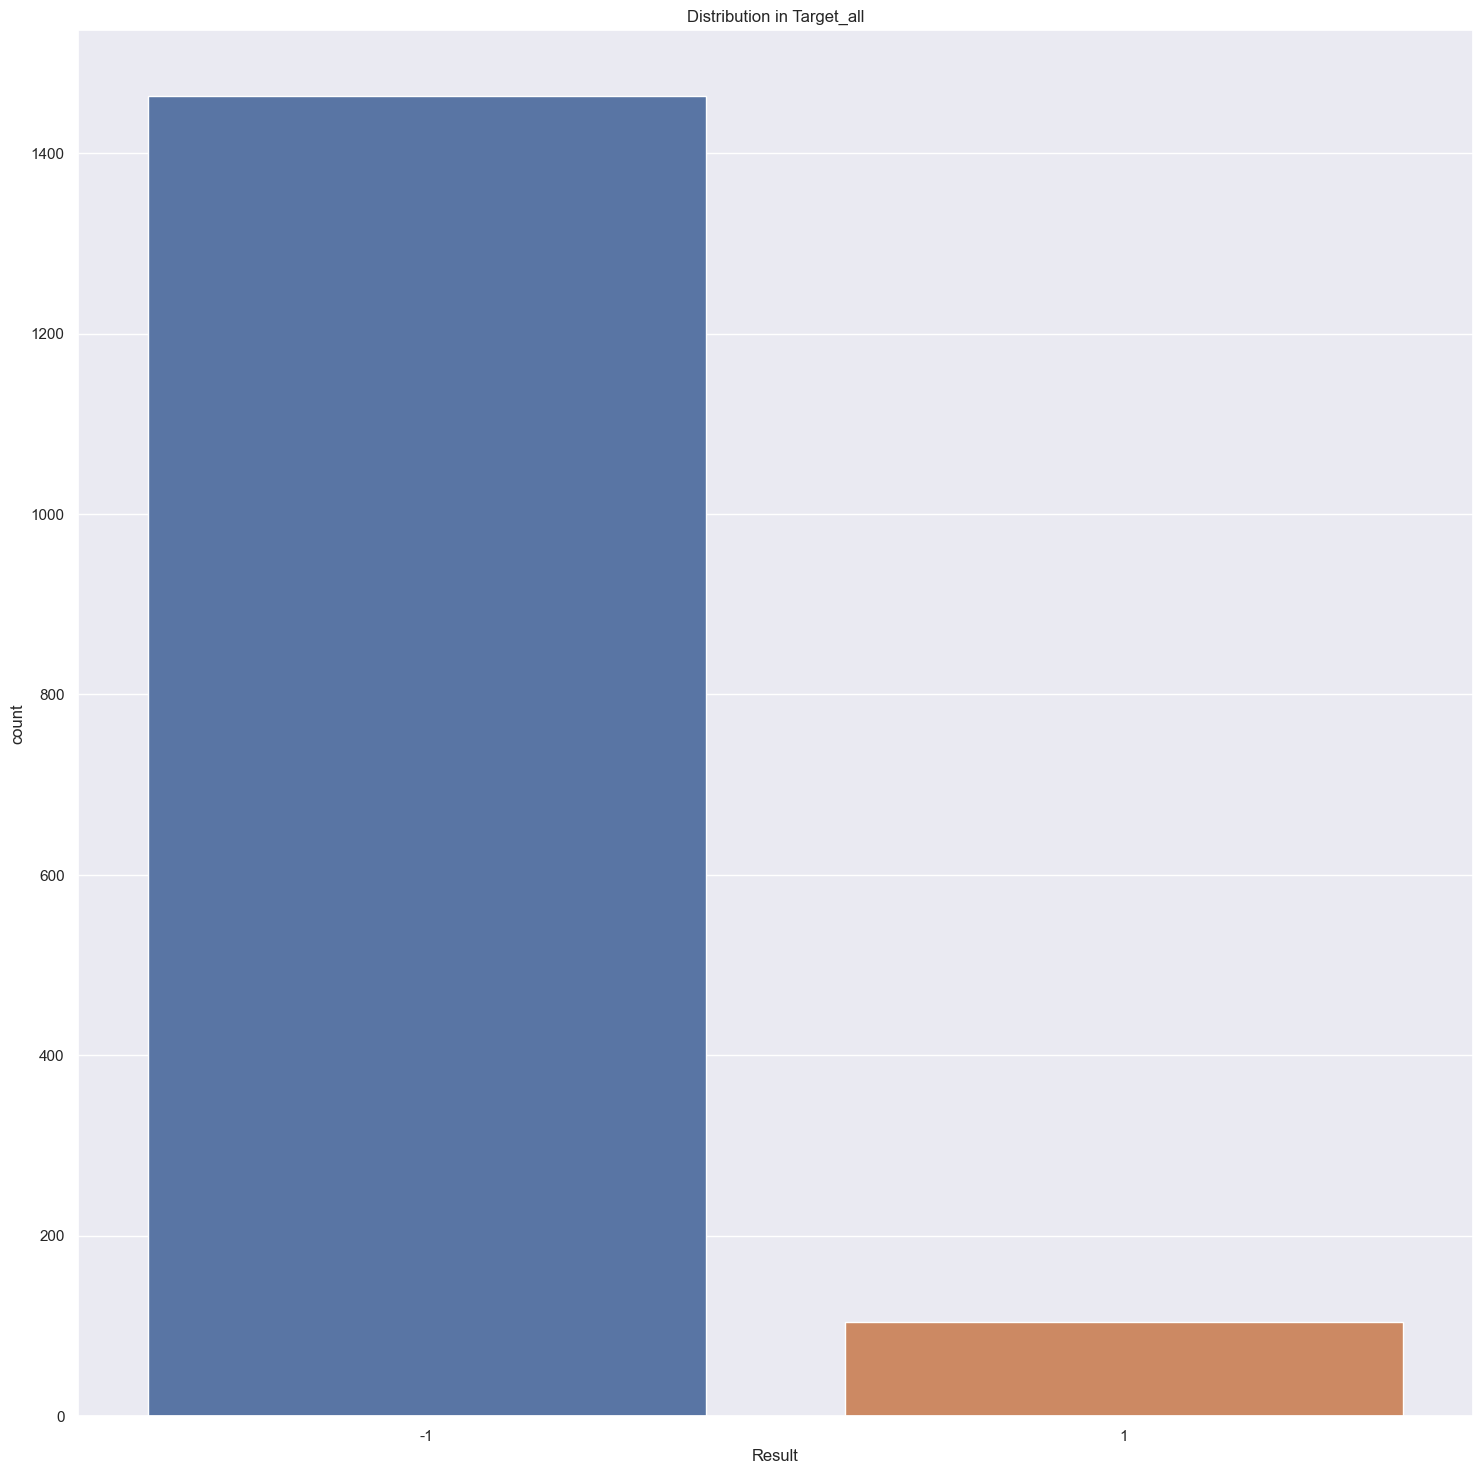

In [314]:
# frequency distribution of target values in bar
# imbalanced datasets 
sns.set(style="darkgrid")
ax = sns.countplot(x = "Result", data = secom_merged).set(title='Distribution in Target_all')

1567 examples, more than 1400 explames are "-1"which means pass, 104 examples are "1" as not pass.

## Splite train, test 80%, 20%

In [315]:
X_train,X_test,y_train,y_test = train_test_split(secom,labels_df,test_size=0.2,random_state=0)

In [316]:
# histogram of percentage of missing values of features, 
# https://www.kaggle.com/code/mohitkumar409/semiconductor-manufacturing-process

df=X_train.isna().sum()*100/X_train.shape[0]
fig = px.line(x=df.index, y=df,title="Percentage of missing values in all the features, data=X_train"
              )
fig.update_xaxes(title_text= 'Features')
fig.update_yaxes(title_text= 'Percentage of Missing values',range=[0,100])
fig.show()

There are measures have high percentage of missing data, which will be anaylzed later on in the training data.

## Data Cleansing, Imputation and Scaling Methods 

In [317]:
# Volatility of features
# check the numbner of missing values of 590 sensor measurements
X_train.isnull().sum()

Feature-0       4
Feature-1       5
Feature-2      11
Feature-3      11
Feature-4      11
               ..
Feature-585     1
Feature-586     1
Feature-587     1
Feature-588     1
Feature-589     1
Length: 590, dtype: int64

Text(0.5, 1.0, 'Pair-wise Correlation heatmap for the Data')

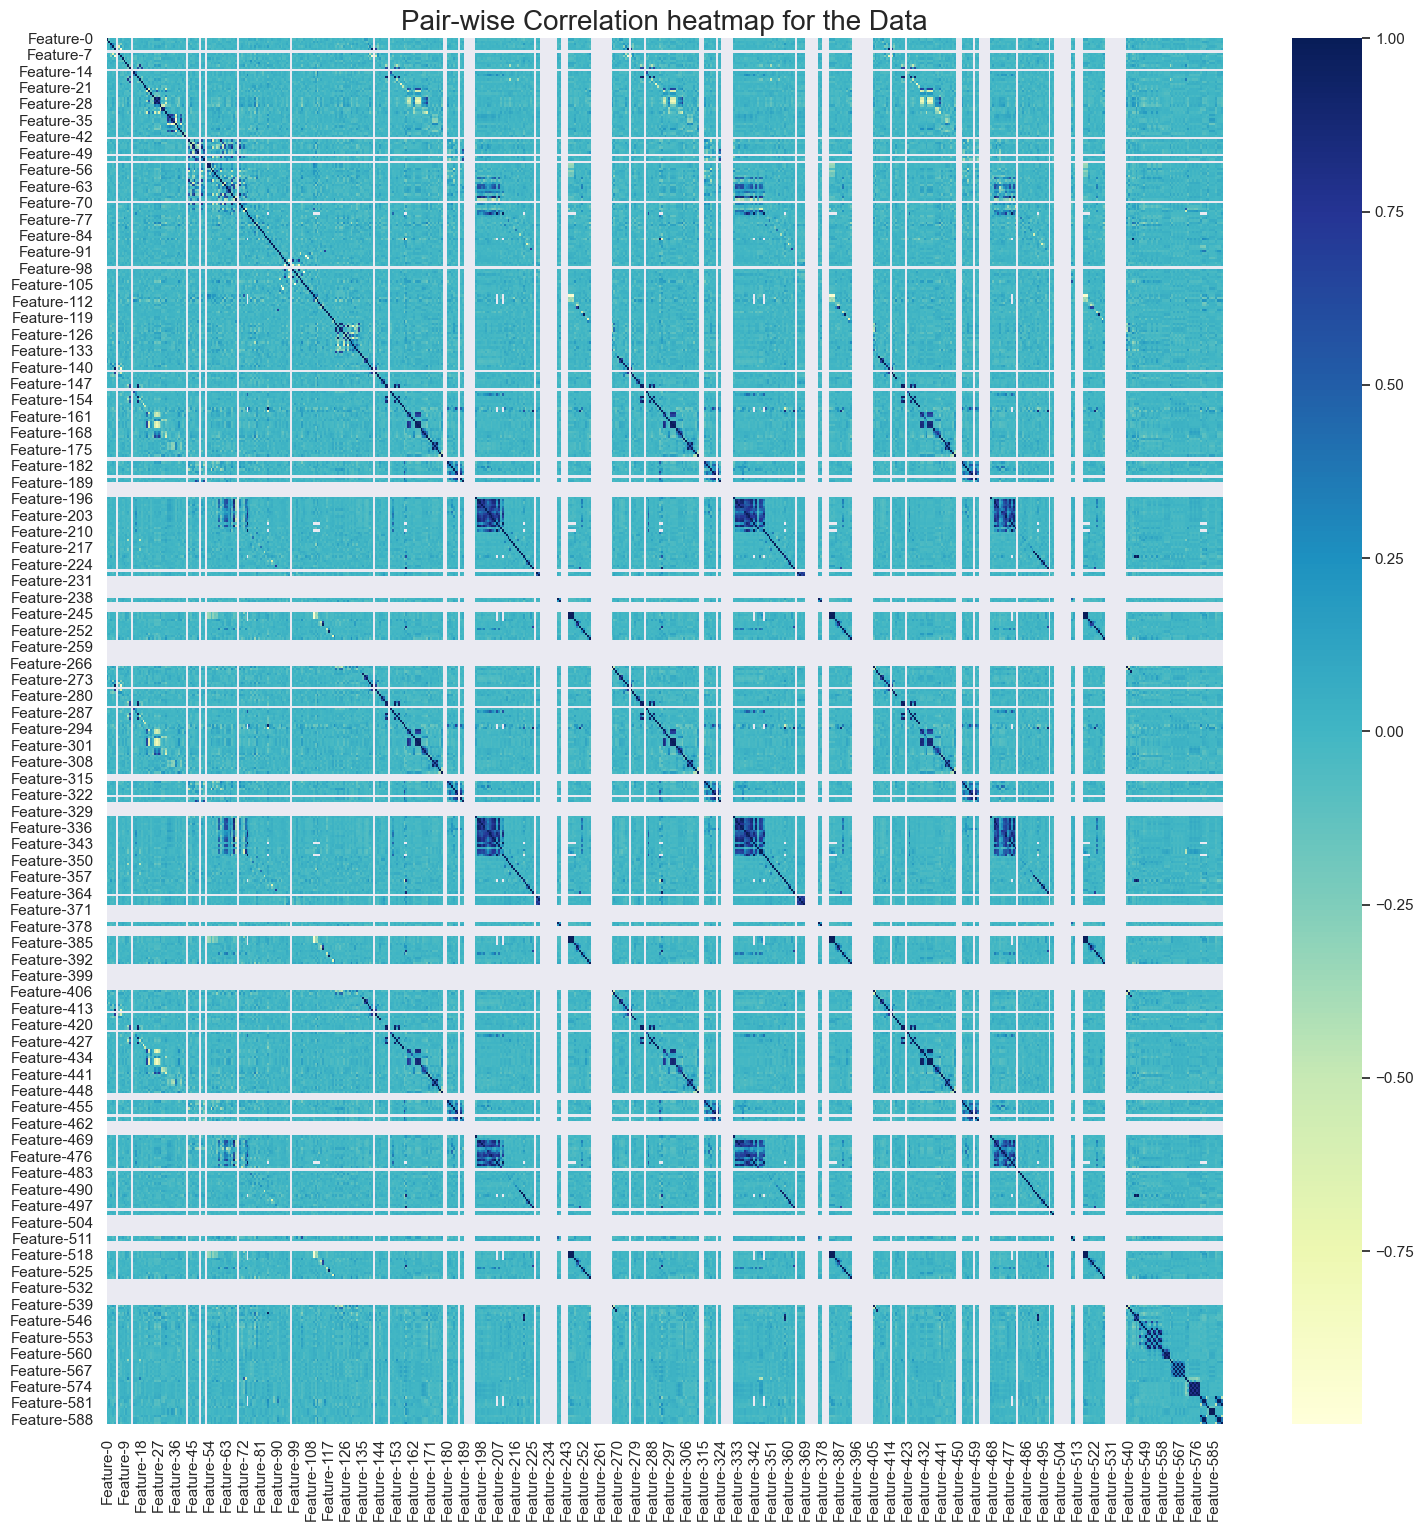

In [318]:
# Pair-wise correlation heatmap, https://www.kaggle.com/code/saurabhbagchi/fmst-semiconductor-manufacturing-project
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(X_train.corr(), cmap = "YlGnBu")
plt.title('Pair-wise Correlation heatmap for the Data', fontsize = 20)

### Duplicate and missing value check, reduce the columns having high missing values

In [319]:
# duplicate identification
if X_train.duplicated().any():
    print("Duplicate rows found")
else:
    print("No duplicate rows found")

No duplicate rows found


In [320]:
#missing value analysis, histogram, threshold defintion

df=X_train.isna().sum().sort_values(ascending=False)
fig = px.bar(x=df.index, 
             y = df, 
             title='Count of missing values per feature , data="x_train"',
             text = round(df,1), color=df)
fig.update_xaxes(title_text='Features with missing value (sorted)',type='category')
fig.update_yaxes(title_text='Count of missing values')
fig.show()

In [321]:
# Total NA 
totalna=X_train.isna().sum().sum()
totalna

33482

In [322]:
df=X_train.isna().sum().sort_values(ascending=False).head(5)
fig = px.bar(x=df.index, 
             y = df, 
             title='Top 5 Features of missing values, data="x_train"',
             text = round(df,1), color=df)
fig.update_xaxes(title_text=' Features with missing value (sorted)',type='category')
fig.update_yaxes(title_text='Count of missing values')
fig.show()

In [323]:
#missing value analysis in training data, histogram, threshold defintion
df=X_train.isna().sum()*100/X_train.shape[0]
df = df[df>45].sort_values(ascending=False)
fig = px.bar(x=df.index, 
             y = df, 
             title='Percentage of missing values per feature (with >45% NaNs), data="x_train"',
             text = round(df,1), color=df)
fig.update_xaxes(title_text='Features with more than 45 % missing value (sorted)',type='category')
fig.update_yaxes(title_text='Percentage of missing values')
fig.show()

In [324]:
#missing value imputation method, reduce the unneed features
# there are 24 columns have more than 45% missing values, in this case will be removed
secom_na=X_train.isna().sum()*100/X_train.shape[0]
secom_na = df[df>45]
secom_na.shape

(32,)

In [325]:
#missing value imputation method, reduce the unneed features,after 566 features left
# https://www.kaggle.com/code/kirshoff/secom-dataset-analysis
X_train = X_train.drop(axis=1, columns=secom_na.index)
X_train.shape


(1253, 558)

558 Features left, after reducing the columns having high percentage of NA

In [326]:
# missing value imputation method
# fill the data of the columns having less missing valeus percentage
#strategy : latest information available
X_train.fillna(method='ffill', inplace=True)
X_train.fillna(method='bfill', inplace=True)
X_train

,Feature-0,Feature-1,Feature-2,Feature-3,Feature-4,Feature-5,Feature-6,Feature-7,Feature-8,Feature-9,...,Feature-576,Feature-577,Feature-582,Feature-583,Feature-584,Feature-585,Feature-586,Feature-587,Feature-588,Feature-589
1476,3000.24,2477.37,2207.1000,1298.4309,1.0251,100.0,96.9478,0.1203,1.4642,0.0749,...,1.0106,12.8330,0.5024,0.0132,0.0040,2.6328,0.0057,0.0328,0.0114,579.1817
218,3038.21,2521.84,2273.7556,1549.8407,1.4105,100.0,105.0467,0.1171,1.3666,-0.0154,...,1.5886,15.6838,0.4968,0.0126,0.0029,2.5302,0.0279,0.0123,0.0045,44.1754
1137,2895.09,2552.96,2260.7333,1969.7867,1.2109,100.0,91.3367,0.1207,1.4135,0.0283,...,1.6892,14.6674,0.4996,0.0187,0.0047,3.7428,0.0392,0.0076,0.0030,19.5115
1533,3011.32,2417.43,2184.9889,1124.2096,2.1987,100.0,114.5856,0.1265,1.3834,0.0002,...,0.8987,12.6242,0.4995,0.0195,0.0044,3.9016,0.0168,0.0349,0.0120,207.2955
1092,3186.16,2316.01,2169.9444,1095.3519,1.3425,100.0,104.0144,0.1208,1.4757,-0.0106,...,1.4926,14.3055,0.5023,0.0271,0.0055,5.4003,0.0228,0.0132,0.0039,57.7037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3032.26,2455.05,2145.4555,1017.0577,1.4534,100.0,103.7878,0.1229,1.3602,-0.0153,...,1.5505,15.3404,0.4973,0.0194,0.0048,3.9109,0.0169,0.0276,0.0081,163.9998
835,3003.72,2537.66,2210.7778,2008.9216,1.1351,100.0,91.1078,0.1240,1.3940,-0.0073,...,1.3573,10.5084,0.5033,0.0154,0.0043,3.0647,0.0099,0.0113,0.0038,114.2878
1216,3031.85,2439.42,2172.8111,969.3436,1.2736,100.0,102.7367,0.1243,1.4711,0.0033,...,1.0627,9.5553,0.5009,0.0167,0.0041,3.3339,0.0293,0.0045,0.0012,15.3444
559,3072.99,2471.62,2126.6555,1015.0770,1.4381,100.0,102.4733,0.1255,1.5006,-0.0321,...,1.6376,18.1211,0.5050,0.0174,0.0042,3.4384,0.0335,0.0122,0.0040,36.2970


In [327]:
# check the result,good, no null values
X_train.isnull().values.any()

False

In [352]:
X_test.isnull().values.any()

True

### Scaling and variance check

In [328]:
df_var= X_train.var()
df_var

Feature-0        5289.664682
Feature-1        6208.226071
Feature-2         861.531175
Feature-3      194790.031132
Feature-4        3934.505579
                   ...      
Feature-585         8.356693
Feature-586         0.000147
Feature-587         0.000084
Feature-588         0.000009
Feature-589      9143.395211
Length: 558, dtype: float64

In [329]:
df_var.min()

0.0

In [330]:
zero_var_features = df_var[df_var==0]
zero_var_features


Feature-5      0.0
Feature-13     0.0
Feature-42     0.0
Feature-49     0.0
Feature-52     0.0
              ... 
Feature-534    0.0
Feature-535    0.0
Feature-536    0.0
Feature-537    0.0
Feature-538    0.0
Length: 116, dtype: float64

In [331]:
df = zero_var_features.value_counts().sort_index()
df.index = df.index.map(str)

fig = px.bar(x=df.index, y=df,title="Zero Variance vs number of features (data: X_train),", text = df, color=df)
fig.update_xaxes(title='variance ')
fig.update_yaxes(title='Number of features')
fig.show()

There are 116 feaures have 0 varinace, that means they are constant, thus will be removed later

### Scaling the train data first

In [332]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [333]:
X_train= scaler.transform(X_train)

In [334]:
X_train= pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,548,549,550,551,552,553,554,555,556,557
0,0.462097,0.485902,0.575162,0.349506,0.000308,0.0,0.314439,0.935459,0.587022,1.000000,...,0.001250,0.089318,0.768750,0.015471,0.022505,0.014726,0.188805,0.385919,0.376812,0.785539
1,0.530369,0.554608,0.836960,0.417180,0.000654,0.0,0.486313,0.910575,0.377310,0.296181,...,0.007706,0.120178,0.593750,0.014181,0.011742,0.013674,0.374269,0.118644,0.126812,0.059915
2,0.273033,0.602688,0.785813,0.530219,0.000475,0.0,0.195360,0.938569,0.478083,0.636789,...,0.008830,0.109175,0.681250,0.027288,0.029354,0.026115,0.468672,0.057366,0.072464,0.026463
3,0.482020,0.393295,0.488317,0.302610,0.001362,0.0,0.688747,0.983670,0.413408,0.417771,...,0.000000,0.087057,0.678125,0.029007,0.026419,0.027744,0.281537,0.413299,0.398551,0.281153
4,0.796390,0.236601,0.429228,0.294842,0.000593,0.0,0.464406,0.939347,0.611732,0.333593,...,0.006634,0.105258,0.765625,0.045337,0.037182,0.043121,0.331662,0.130378,0.105072,0.078263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.519671,0.451418,0.333045,0.273768,0.000693,0.0,0.459597,0.955677,0.363558,0.296960,...,0.007281,0.116461,0.609375,0.028792,0.030333,0.027840,0.282373,0.318123,0.257246,0.222431
1249,0.468354,0.579050,0.589607,0.540753,0.000407,0.0,0.190503,0.964230,0.436184,0.359314,...,0.005123,0.064154,0.796875,0.020198,0.025440,0.019158,0.223893,0.105606,0.101449,0.155008
1250,0.518933,0.427269,0.440488,0.260924,0.000532,0.0,0.437290,0.966563,0.601848,0.441933,...,0.001832,0.053836,0.721875,0.022991,0.023483,0.021920,0.385965,0.016949,0.007246,0.020811
1251,0.592905,0.477018,0.259206,0.273234,0.000679,0.0,0.431700,0.975894,0.665234,0.166017,...,0.008254,0.146562,0.850000,0.024495,0.024462,0.022992,0.421053,0.117340,0.108696,0.049229


In [335]:
# https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
# https://www.kaggle.com/code/kirshoff/secom-dataset-analysis
pca = PCA().fit(X_train)

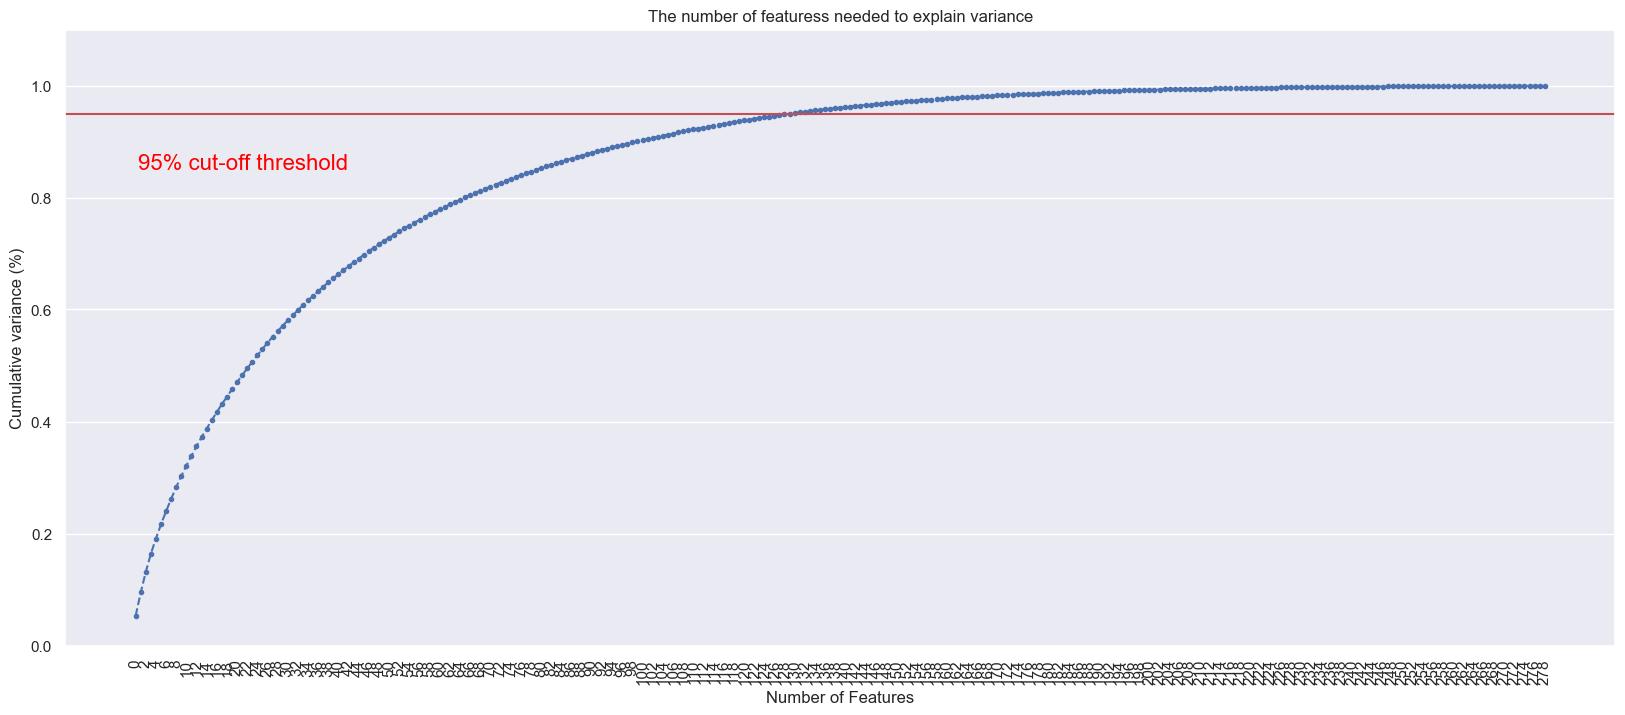

In [336]:
# https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
# https://www.kaggle.com/code/kirshoff/secom-dataset-analysis

fig, ax = plt.subplots(figsize=(20,8))
xi = np.arange(0, 279, step=1)
y = np.cumsum(pca.explained_variance_ratio_[0:279:1])

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of Features')
plt.xticks(np.arange(0, 279, step=2), rotation=90) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of featuress needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

We want the explained variance to be between 95–99%

In [337]:
# using vairancethreshold remove the unneed features
selector = VarianceThreshold()
selector.fit(X_train)
mask = selector.get_support()
columns = X_train.columns
selected_cols = columns[mask]
n_features2 = len(selected_cols)
print(f'remaining features: {n_features2}')

remaining features: 442


In [338]:
X_train = pd.DataFrame(selector.transform(X_train), columns = selected_cols)
X_train

,0,1,2,3,4,6,7,8,9,10,...,548,549,550,551,552,553,554,555,556,557
0,0.462097,0.485902,0.575162,0.349506,0.000308,0.314439,0.935459,0.587022,1.000000,0.531286,...,0.001250,0.089318,0.768750,0.015471,0.022505,0.014726,0.188805,0.385919,0.376812,0.785539
1,0.530369,0.554608,0.836960,0.417180,0.000654,0.486313,0.910575,0.377310,0.296181,0.450512,...,0.007706,0.120178,0.593750,0.014181,0.011742,0.013674,0.374269,0.118644,0.126812,0.059915
2,0.273033,0.602688,0.785813,0.530219,0.000475,0.195360,0.938569,0.478083,0.636789,0.323094,...,0.008830,0.109175,0.681250,0.027288,0.029354,0.026115,0.468672,0.057366,0.072464,0.026463
3,0.482020,0.393295,0.488317,0.302610,0.001362,0.688747,0.983670,0.413408,0.417771,0.367463,...,0.000000,0.087057,0.678125,0.029007,0.026419,0.027744,0.281537,0.413299,0.398551,0.281153
4,0.796390,0.236601,0.429228,0.294842,0.000593,0.464406,0.939347,0.611732,0.333593,0.342435,...,0.006634,0.105258,0.765625,0.045337,0.037182,0.043121,0.331662,0.130378,0.105072,0.078263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.519671,0.451418,0.333045,0.273768,0.000693,0.459597,0.955677,0.363558,0.296960,0.433447,...,0.007281,0.116461,0.609375,0.028792,0.030333,0.027840,0.282373,0.318123,0.257246,0.222431
1249,0.468354,0.579050,0.589607,0.540753,0.000407,0.190503,0.964230,0.436184,0.359314,0.403868,...,0.005123,0.064154,0.796875,0.020198,0.025440,0.019158,0.223893,0.105606,0.101449,0.155008
1250,0.518933,0.427269,0.440488,0.260924,0.000532,0.437290,0.966563,0.601848,0.441933,0.374289,...,0.001832,0.053836,0.721875,0.022991,0.023483,0.021920,0.385965,0.016949,0.007246,0.020811
1251,0.592905,0.477018,0.259206,0.273234,0.000679,0.431700,0.975894,0.665234,0.166017,0.298066,...,0.008254,0.146562,0.850000,0.024495,0.024462,0.022992,0.421053,0.117340,0.108696,0.049229


In [339]:
X_train = X_train.add_prefix('Feature-')
X_train

,Feature-0,Feature-1,Feature-2,Feature-3,Feature-4,Feature-6,Feature-7,Feature-8,Feature-9,Feature-10,...,Feature-548,Feature-549,Feature-550,Feature-551,Feature-552,Feature-553,Feature-554,Feature-555,Feature-556,Feature-557
0,0.462097,0.485902,0.575162,0.349506,0.000308,0.314439,0.935459,0.587022,1.000000,0.531286,...,0.001250,0.089318,0.768750,0.015471,0.022505,0.014726,0.188805,0.385919,0.376812,0.785539
1,0.530369,0.554608,0.836960,0.417180,0.000654,0.486313,0.910575,0.377310,0.296181,0.450512,...,0.007706,0.120178,0.593750,0.014181,0.011742,0.013674,0.374269,0.118644,0.126812,0.059915
2,0.273033,0.602688,0.785813,0.530219,0.000475,0.195360,0.938569,0.478083,0.636789,0.323094,...,0.008830,0.109175,0.681250,0.027288,0.029354,0.026115,0.468672,0.057366,0.072464,0.026463
3,0.482020,0.393295,0.488317,0.302610,0.001362,0.688747,0.983670,0.413408,0.417771,0.367463,...,0.000000,0.087057,0.678125,0.029007,0.026419,0.027744,0.281537,0.413299,0.398551,0.281153
4,0.796390,0.236601,0.429228,0.294842,0.000593,0.464406,0.939347,0.611732,0.333593,0.342435,...,0.006634,0.105258,0.765625,0.045337,0.037182,0.043121,0.331662,0.130378,0.105072,0.078263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.519671,0.451418,0.333045,0.273768,0.000693,0.459597,0.955677,0.363558,0.296960,0.433447,...,0.007281,0.116461,0.609375,0.028792,0.030333,0.027840,0.282373,0.318123,0.257246,0.222431
1249,0.468354,0.579050,0.589607,0.540753,0.000407,0.190503,0.964230,0.436184,0.359314,0.403868,...,0.005123,0.064154,0.796875,0.020198,0.025440,0.019158,0.223893,0.105606,0.101449,0.155008
1250,0.518933,0.427269,0.440488,0.260924,0.000532,0.437290,0.966563,0.601848,0.441933,0.374289,...,0.001832,0.053836,0.721875,0.022991,0.023483,0.021920,0.385965,0.016949,0.007246,0.020811
1251,0.592905,0.477018,0.259206,0.273234,0.000679,0.431700,0.975894,0.665234,0.166017,0.298066,...,0.008254,0.146562,0.850000,0.024495,0.024462,0.022992,0.421053,0.117340,0.108696,0.049229


In [340]:
y_train

,Result
1476,-1
218,1
1137,-1
1533,-1
1092,-1
...,...
763,-1
835,-1
1216,-1
559,-1


In [341]:
X = X_train.values
Y = y_train.values.ravel()

After selection, 442 features left

## Boruta feature selection


In [342]:
# fit the data to the chosen model
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X,Y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [343]:
# https://towardsdatascience.com/simple-example-using-boruta-feature-selection-in-python-8b96925d5d7a
from boruta import BorutaPy

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2, random_state=1)
# find all relevant features
feat_selector.fit(X, Y)
# check selected features
feat_selector.support_
# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	442
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	442
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	442
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	442
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	442
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	442
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	442
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	411
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	27
Rejected: 	411
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	27
Rejected: 	411
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	27
Rejected: 	411
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	24
Rejected: 	414
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	24
Rejected: 	414
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	24
Rejected: 	414
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	24
Rejected: 	414
Iteration: 	16 / 100
Confirmed: 	6
Tentat

array([ 82, 399, 182, 315, 387, 260, 219,  97, 271, 154, 223, 316,  59,
       113, 178, 184, 242,  22, 341,   1, 168, 371, 239, 102, 158, 140,
         2, 206, 273,   1,  30,   1, 264,  23, 216, 112, 148,  70,  35,
       132, 169, 250, 163, 401, 193,  72, 286, 159, 368, 195,  26,  14,
       135,  43,   1, 260, 143, 160,  52,   1,   1, 149, 125,  78, 176,
       200, 421, 231,  35, 195, 122,   7, 277,  45, 275, 337, 378, 259,
       365, 138, 151,   2,  80, 177, 216, 412, 411, 348, 311, 331, 147,
       412,   1,   1, 391, 200, 325, 361, 384, 171, 416,  41, 234,  64,
       314, 327,  29,   1,  11, 102,   2,   4,   1,   7, 131,   1,   1,
       102,  79,  19, 187,  95, 303,  86, 208, 206, 374, 222, 108,  96,
       186, 157,  50, 252, 339, 347,   2,  47, 380,  55,  93, 126, 109,
       285, 266,  57, 229, 241, 353, 406, 304, 308, 294, 283, 110, 266,
       173,  70, 393, 225,   2, 180,  27,  64, 203, 331, 182,  88,  70,
       310, 110, 244, 252,  33, 371, 288, 135, 281,   5, 421,  9

In [344]:
#' Get all feature names from the dataset'
# https://www.kaggle.com/code/rsmits/feature-selection-with-boruta/notebook
features = [f for f in X_train.columns if f not in ['TARGET','SK_ID_CURR']]
len(features)

442

In [345]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(features, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

Feature: Feature-0                 Rank: 82,  Keep: False
Feature: Feature-1                 Rank: 399,  Keep: False
Feature: Feature-2                 Rank: 182,  Keep: False
Feature: Feature-3                 Rank: 315,  Keep: False
Feature: Feature-4                 Rank: 387,  Keep: False
Feature: Feature-6                 Rank: 260,  Keep: False
Feature: Feature-7                 Rank: 219,  Keep: False
Feature: Feature-8                 Rank: 97,  Keep: False
Feature: Feature-9                 Rank: 271,  Keep: False
Feature: Feature-10                Rank: 154,  Keep: False
Feature: Feature-11                Rank: 223,  Keep: False
Feature: Feature-12                Rank: 316,  Keep: False
Feature: Feature-14                Rank: 59,  Keep: False
Feature: Feature-15                Rank: 113,  Keep: False
Feature: Feature-16                Rank: 178,  Keep: False
Feature: Feature-17                Rank: 184,  Keep: False
Feature: Feature-18                Rank: 242,  Keep: False


In [346]:
# And we create a list of the feature names if we would like to use them at a later stage.
final_features = list()
indexes = np.where(feat_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

['Feature-21', 'Feature-31', 'Feature-33', 'Feature-59', 'Feature-64', 'Feature-65', 'Feature-99', 'Feature-100', 'Feature-114', 'Feature-119', 'Feature-122', 'Feature-123', 'Feature-330']


In [347]:
final_features

['Feature-21',
 'Feature-31',
 'Feature-33',
 'Feature-59',
 'Feature-64',
 'Feature-65',
 'Feature-99',
 'Feature-100',
 'Feature-114',
 'Feature-119',
 'Feature-122',
 'Feature-123',
 'Feature-330']

In [348]:
# select the final feautres from x.train
X_train_filtered = X_train[final_features]
X_train_filtered 

,Feature-21,Feature-31,Feature-33,Feature-59,Feature-64,Feature-65,Feature-99,Feature-100,Feature-114,Feature-119,Feature-122,Feature-123,Feature-330
0,0.284792,0.478398,0.067710,0.146823,0.319612,0.210449,0.524484,0.360902,0.131148,0.076923,0.605900,0.418356,0.048164
1,0.108506,0.932978,0.114127,0.276545,0.188613,0.125293,0.608137,0.492481,0.688525,0.239855,0.605900,0.837567,0.061516
2,0.337835,0.434894,0.087574,0.163101,0.244177,0.150230,0.582093,0.424812,0.475410,0.342823,0.189033,0.923372,0.018598
3,0.251370,0.467653,0.098386,0.144752,0.329208,0.148237,0.609097,0.422932,0.426230,0.192611,0.446625,0.501814,0.060086
4,0.258207,0.480615,0.087574,0.153620,0.288112,0.153310,0.656625,0.415414,0.672131,0.351302,0.181498,0.819210,0.064855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.146983,0.449320,0.044302,0.136912,0.365538,0.209601,0.653625,0.462406,0.491803,0.393701,0.651403,0.873426,0.062947
1249,0.277700,0.485311,0.079989,0.182696,0.153373,0.107382,0.601056,0.411654,0.721311,0.345851,0.605900,0.925720,0.057701
1250,0.272646,0.467916,0.073205,0.110769,0.486685,0.244923,0.633941,0.458647,0.786885,0.115687,0.567981,0.668303,0.030997
1251,0.130420,0.936998,0.138508,0.144932,0.328376,0.200552,0.661786,0.415414,0.754098,0.079346,0.590733,0.690928,0.072008


In [349]:
# select the same features in x.test as well
X_test_filtered = X_test[final_features]
X_test_filtered 


,Feature-21,Feature-31,Feature-33,Feature-59,Feature-64,Feature-65,Feature-99,Feature-100,Feature-114,Feature-119,Feature-122,Feature-123,Feature-330
319,-5742.25,3.4157,8.5266,1.8182,18.1818,23.2779,0.0530,0.0000,0.0,0.9764,4.232,15.91,0.0
1045,-5621.50,3.3523,8.7548,-4.4882,24.4882,32.5465,0.0335,-0.0005,0.0,0.9639,3.012,15.57,0.0
1323,-5470.00,3.2247,9.2064,3.6400,16.3600,21.5576,0.0670,0.0000,0.0,0.9655,4.207,15.92,0.0
579,-5410.00,3.4262,8.7283,2.4718,17.5282,24.4754,0.1051,-0.0002,0.0,0.9650,4.410,16.01,0.0
414,-5349.75,3.3271,8.6590,1.9855,18.0145,23.2014,-0.0140,-0.0002,0.0,0.9694,3.165,15.87,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,-5305.00,3.3823,8.6149,-0.8727,20.8727,26.3080,0.0093,0.0002,0.0,0.9618,6.086,15.76,0.0
279,-6277.75,4.6491,8.5788,16.2418,23.7582,30.5545,-0.0419,0.0001,0.0,0.9656,4.631,15.86,0.0
884,-5652.50,3.4319,8.8889,5.4709,14.5291,18.5294,-0.0270,0.0007,0.0,0.9616,3.583,15.84,0.0
224,-6508.50,4.6488,8.6406,5.4191,14.5809,21.3926,0.0446,0.0003,0.0,0.9690,2.632,15.83,0.0


###  Imbalance of the target variable in training data

A huge imbalance found in the train_target data, thus using imbalance package to turn it balanced

In [355]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 14)
X_train_filtered, y_train = smote.fit_resample(X_train_filtered, y_train)

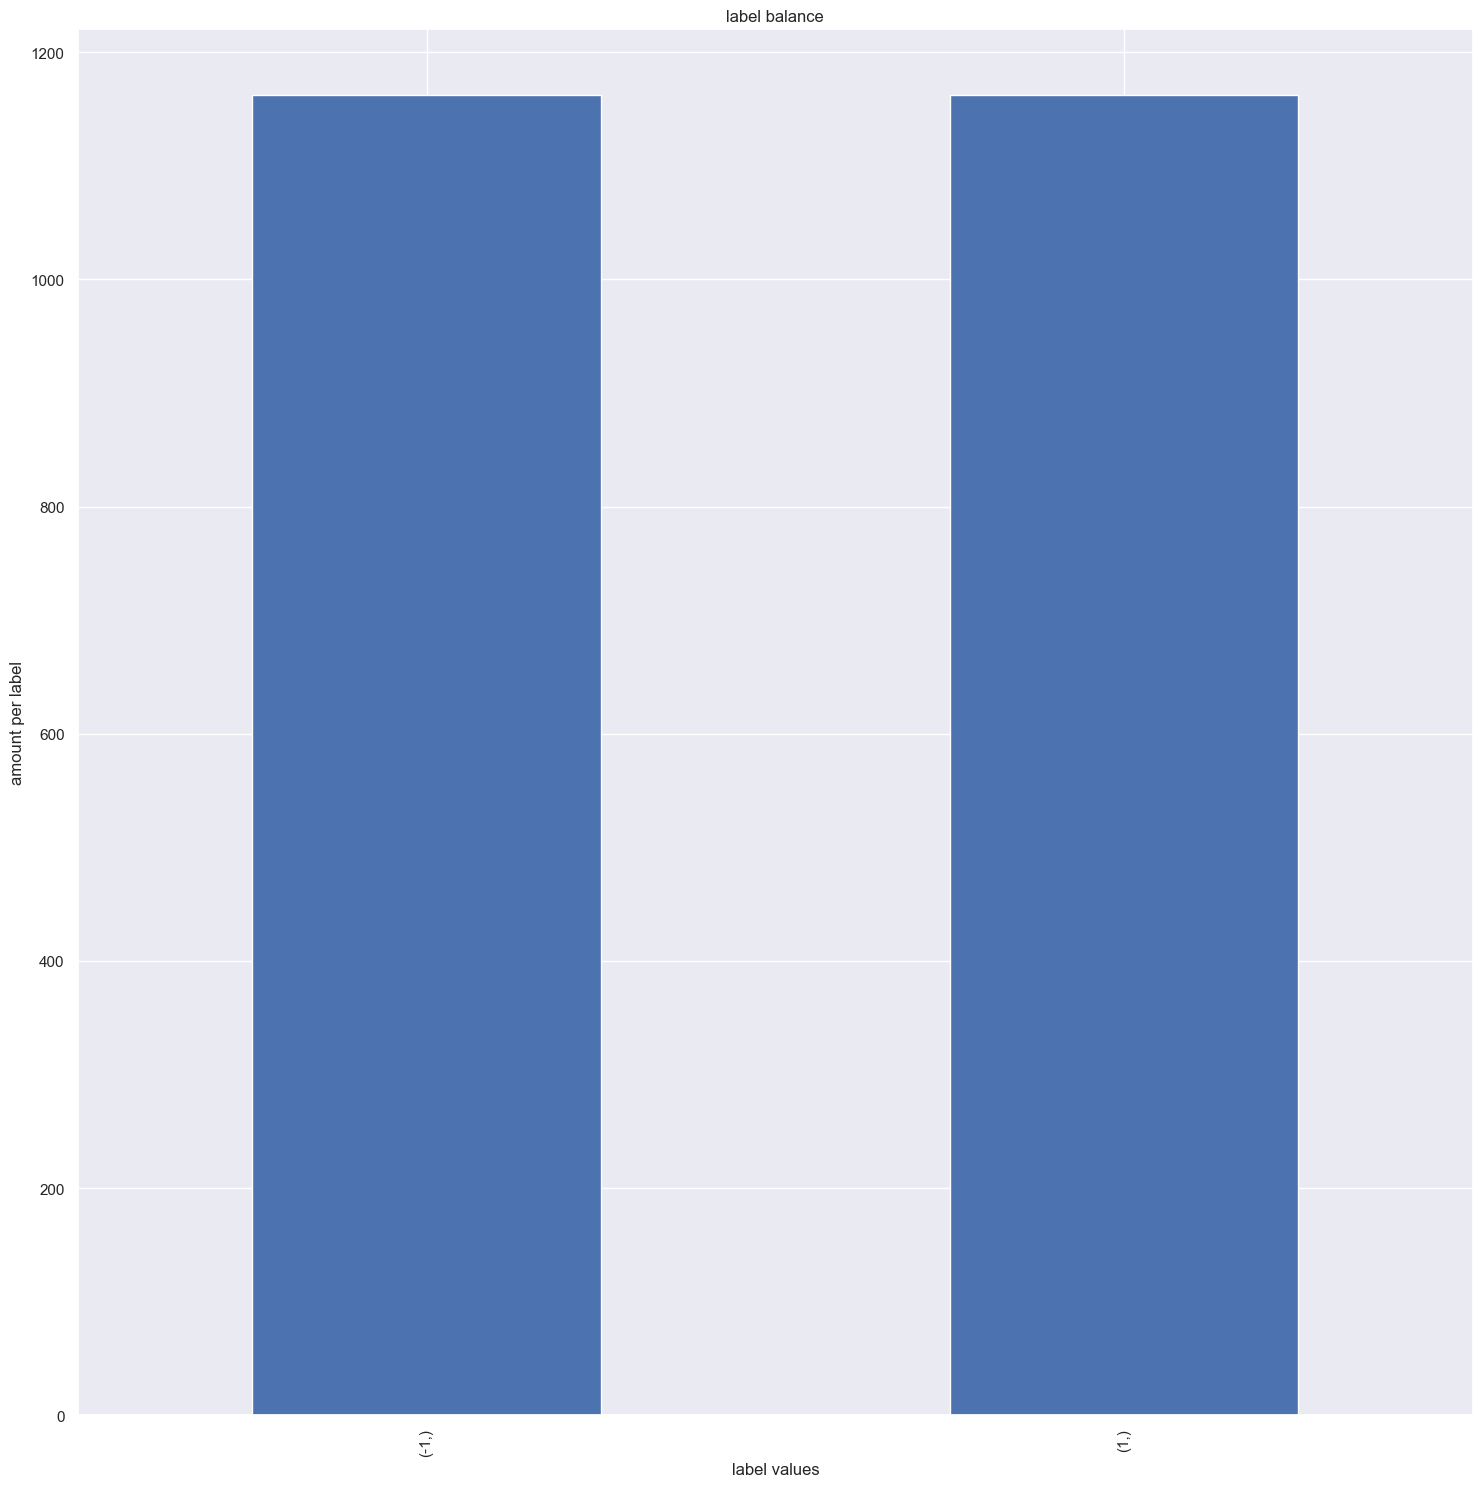

In [361]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

# Build model

### Logistics Regression

In [358]:
# Self defined function to measure the accuracy
def evaluate_model(model, X_test, y_test):
    
    acc = model.score(X_test, y_test)
    print("Accuracy: {:.2f}%".format(acc * 100))
    

In [359]:
model = LogisticRegression()
model.fit(X_train_filtered, y_train.values.ravel())

y_pred = model.predict(X_test_filtered)
evaluate_model(model, X_test_filtered, y_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<AxesSubplot: title={'center': 'Confusion Matrix for Logistic Regression'}>

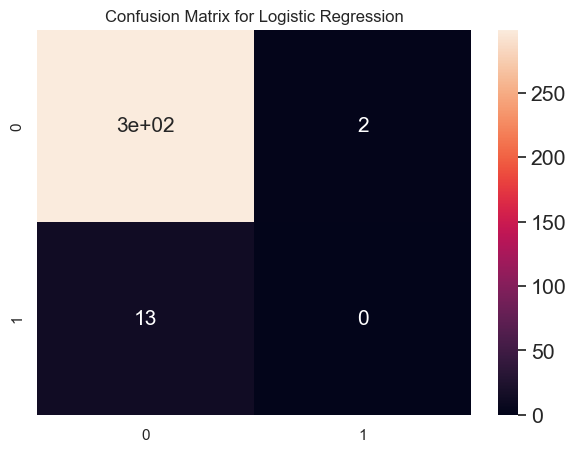

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Logistic Regression')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
# Extend model assessment by taking into account costs for wrongly classified wafers.

In [ ]:
# Lasso, select the model

In [ ]:
# Findings